## Laboratorio 3

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
data = pd.read_csv("train.csv")


## Exploracion Data

In [4]:
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
data['item'].value_counts()

1     18260
38    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
39    18260
2     18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
27    18260
26    18260
25    18260
24    18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
50    18260
Name: item, dtype: int64

In [6]:
data['store'].value_counts()

1     91300
2     91300
3     91300
4     91300
5     91300
6     91300
7     91300
8     91300
9     91300
10    91300
Name: store, dtype: int64

In [7]:
data['date'].value_counts()

2013-01-01    500
2016-05-11    500
2016-05-09    500
2016-05-08    500
2016-05-07    500
             ... 
2014-08-29    500
2014-08-28    500
2014-08-27    500
2014-08-26    500
2017-12-31    500
Name: date, Length: 1826, dtype: int64

## Validando RNN por item x Tienda

In [96]:
data_1_1=data[(data.store == 1) & (data.item == 1)]

In [97]:
data_1_1

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
1821,2017-12-27,1,1,14
1822,2017-12-28,1,1,19
1823,2017-12-29,1,1,15
1824,2017-12-30,1,1,27


In [117]:
data_1_1Trainig = data_1_1.iloc[:1461,]
data_1_1Trainig

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
1456,2016-12-27,1,1,10
1457,2016-12-28,1,1,16
1458,2016-12-29,1,1,21
1459,2016-12-30,1,1,24


In [118]:
data_1_1Test = data_1_1.iloc[1461:,]
data_1_1Test

,date,store,item,sales
1461,2017-01-01,1,1,19
1462,2017-01-02,1,1,15
1463,2017-01-03,1,1,10
1464,2017-01-04,1,1,16
1465,2017-01-05,1,1,14
...,...,...,...,...
1821,2017-12-27,1,1,14
1822,2017-12-28,1,1,19
1823,2017-12-29,1,1,15
1824,2017-12-30,1,1,27


In [119]:
data_1_1Test=data_1_1Test.iloc[:,1:].values
data_1_1Trainig=data_1_1Trainig.iloc[:,1:].values

In [80]:
data_1_1 = data_1_1.iloc[:, 3].values

In [81]:
data_1_1

array([13, 11, 14, ..., 15, 27, 23], dtype=int64)

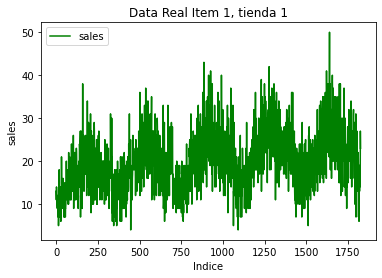

In [82]:
plt.plot(data_1_1, color='green', label='sales')
plt.title('Data Real Item 1, tienda 1')
plt.xlabel("Indice")
plt.ylabel("sales")
plt.legend()
plt.show()

## Preparacion de Training y test

In [120]:
data_1_1Test

array([[ 1,  1, 19],
       [ 1,  1, 15],
       [ 1,  1, 10],
       ...,
       [ 1,  1, 15],
       [ 1,  1, 27],
       [ 1,  1, 23]], dtype=int64)

In [121]:
data_1_1Trainig

array([[ 1,  1, 13],
       [ 1,  1, 11],
       [ 1,  1, 14],
       ...,
       [ 1,  1, 21],
       [ 1,  1, 24],
       [ 1,  1, 14]], dtype=int64)

In [122]:
X_train = []
Y_train = []
cantidad = data_1_1Trainig.shape[0]
ventana = 365
for i in range(ventana, cantidad):
  X_train.append(data_1_1Trainig[i - ventana: i, 0])
  Y_train.append(data_1_1Trainig[i, 0])

In [123]:
X_train = np.array(X_train)
y_train = np.array(Y_train)

In [124]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [125]:
forecaster = Sequential()
forecaster.add(LSTM(input_shape=(X_train.shape[1], 1), units=100, return_sequences=True))
forecaster.add(LSTM(units=25, return_sequences=True))
forecaster.add(LSTM(units=50, return_sequences=False))
forecaster.add(Dense(units=1, activation='relu'))

In [126]:
forecaster.compile(optimizer='adam', loss='mean_squared_error')

In [129]:
#parametros de entrenamiento
forecaster.fit(X_train, y_train, epochs=25, batch_size=100)

Epoch 1/25
11/11 [==============================] - 14s 1s/step - loss: 5.7361e-05
Epoch 2/25
11/11 [==============================] - 15s 1s/step - loss: 1.9732e-05
Epoch 3/25
11/11 [==============================] - 15s 1s/step - loss: 5.8843e-06
Epoch 4/25
11/11 [==============================] - 15s 1s/step - loss: 1.4498e-06
Epoch 5/25
11/11 [==============================] - 18s 2s/step - loss: 4.5663e-07
Epoch 6/25
11/11 [==============================] - 15s 1s/step - loss: 2.1095e-07
Epoch 7/25
11/11 [==============================] - 20s 2s/step - loss: 6.1098e-08
Epoch 8/25
11/11 [==============================] - 16s 1s/step - loss: 1.3993e-08
Epoch 9/25
11/11 [==============================] - 16s 1s/step - loss: 7.1145e-09
Epoch 10/25
11/11 [==============================] - 15s 1s/step - loss: 1.7058e-09
Epoch 11/25
11/11 [==============================] - 15s 1s/step - loss: 5.8483e-10
Epoch 12/25
11/11 [==============================] - 15s 1s/step - loss: 2.1052e-10
E

In [131]:
real_test_price = (data_1_1.iloc[1461:,]).iloc[:, 1:].values
real_test_price

array([[ 1,  1, 19],
       [ 1,  1, 15],
       [ 1,  1, 10],
       ...,
       [ 1,  1, 15],
       [ 1,  1, 27],
       [ 1,  1, 23]], dtype=int64)

In [133]:
dataset_total = pd.concat((data_1_1.iloc[:1461,3], data_1_1.iloc[1461:,3]), axis=0)
dataset_total

0       13
1       11
2       14
3       13
4       10
        ..
1821    14
1822    19
1823    15
1824    27
1825    23
Name: sales, Length: 1826, dtype: int64

In [135]:
input_test = dataset_total[len(dataset_total) - len(data_1_1.iloc[1461:,]) - ventana : ].values
input_test = input_test.reshape(-1, 1)
input_test

array([[13],
       [12],
       [12],
       [12],
       [16],
       [12],
       [12],
       [16],
       [26],
       [ 7],
       [13],
       [ 9],
       [18],
       [13],
       [ 8],
       [13],
       [ 7],
       [17],
       [13],
       [12],
       [15],
       [23],
       [21],
       [15],
       [18],
       [14],
       [17],
       [16],
       [14],
       [14],
       [16],
       [16],
       [19],
       [ 9],
       [14],
       [14],
       [18],
       [12],
       [14],
       [16],
       [14],
       [15],
       [10],
       [23],
       [ 8],
       [19],
       [29],
       [17],
       [18],
       [18],
       [21],
       [16],
       [16],
       [10],
       [12],
       [ 9],
       [21],
       [12],
       [14],
       [16],
       [17],
       [20],
       [17],
       [17],
       [22],
       [17],
       [ 9],
       [18],
       [15],
       [22],
       [17],
       [23],
       [13],
       [11],
       [23],
       [19],
       [21],

In [136]:
cantidad_final = len(input_test)
cantidad_final

730

In [137]:
X_test = []
for i in range(ventana, cantidad_final):
  X_test.append(input_test[i - ventana:i, 0])

X_test = np.array(X_test)

In [138]:
X_test.shape

(365, 365)

In [139]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [140]:
X_test.shape

(365, 365, 1)

In [145]:
X_test

array([[[13],
        [12],
        [12],
        ...,
        [21],
        [24],
        [14]],

       [[12],
        [12],
        [12],
        ...,
        [24],
        [14],
        [19]],

       [[12],
        [12],
        [16],
        ...,
        [14],
        [19],
        [15]],

       ...,

       [[21],
        [24],
        [14],
        ...,
        [16],
        [14],
        [19]],

       [[24],
        [14],
        [19],
        ...,
        [14],
        [19],
        [15]],

       [[14],
        [19],
        [15],
        ...,
        [19],
        [15],
        [27]]], dtype=int64)

In [141]:
predicciones_rnn = forecaster.predict(X_test)
predicciones_rnn

12/12 [==============================] - 7s 274ms/step


array([[1.1039958],
       [1.1041788],
       [1.104238 ],
       [1.1038809],
       [1.1036532],
       [1.1034095],
       [1.1035583],
       [1.1035631],
       [1.1037214],
       [1.1039201],
       [1.1037369],
       [1.103506 ],
       [1.1034299],
       [1.1027822],
       [1.1023815],
       [1.1025819],
       [1.1027329],
       [1.1027373],
       [1.1024147],
       [1.1022633],
       [1.1024671],
       [1.1024774],
       [1.102718 ],
       [1.1024864],
       [1.1024592],
       [1.1023959],
       [1.1022269],
       [1.1017858],
       [1.1015753],
       [1.1018174],
       [1.1016076],
       [1.1015675],
       [1.1015848],
       [1.1017197],
       [1.1021658],
       [1.1028033],
       [1.103522 ],
       [1.1039824],
       [1.10403  ],
       [1.1042223],
       [1.1043319],
       [1.1043637],
       [1.1044497],
       [1.1046017],
       [1.1043652],
       [1.1041303],
       [1.1042165],
       [1.1039605],
       [1.1038225],
       [1.103979 ],


In [142]:
predicciones_rnn.shape

(365, 1)

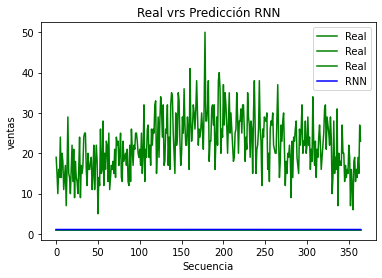

In [153]:
plt.plot(real_test_price, color="green", label="Real")
plt.plot(predicciones_rnn, color="blue", label="RNN")
plt.title("Real vrs Predicción RNN")
plt.xlabel("Secuencia")
plt.ylabel("ventas")
plt.legend()
plt.show()